#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import math
from sklearn.metrics import mean_squared_error

#Importing Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Session/IRIS.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Data Preprocessing

In [3]:
df = df.sample(frac=1)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 101
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df1=df.copy()
df1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
29,4.7,3.2,1.6,0.2,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df1['encode_species']=encode.fit_transform(df['species'])
df1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,encode_species
1,4.9,3.0,1.4,0.2,Iris-setosa,0
84,5.4,3.0,4.5,1.5,Iris-versicolor,1
29,4.7,3.2,1.6,0.2,Iris-setosa,0
130,7.4,2.8,6.1,1.9,Iris-virginica,2
40,5.0,3.5,1.3,0.3,Iris-setosa,0


#Splitting Independent and Dependent Variables

In [8]:
x = df1.iloc[:,:4].values
y = df1.iloc[:,-1].values
# x.head()

#Splitting the Dataset  into Train and Test Dataset

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 0)

#Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
x_train

array([[ 0.59984343, -1.72975376,  0.37831801,  0.14058262],
       [-0.51518395,  0.78209988, -1.14814568, -1.27597511],
       [-1.25853553,  0.09704889, -1.20468138, -1.27597511],
       [ 0.22816764, -0.35965177,  0.4348537 ,  0.39813857],
       [ 0.72373536,  0.32539922,  0.88713924,  1.42836238],
       [-0.88685974, -1.27305309, -0.41318168, -0.11697333],
       [-0.26740008, -0.35965177, -0.07396753,  0.14058262],
       [ 0.59984343, -1.27305309,  0.66099647,  0.39813857],
       [-1.01075167,  1.23880055, -1.31775276, -1.27597511],
       [-0.88685974,  1.69550121, -1.0350743 , -1.01841916],
       [-0.39129201, -1.72975376,  0.15217524,  0.14058262],
       [-1.38242746,  0.32539922, -1.20468138, -1.27597511],
       [ 2.33433046, -0.13130144,  1.33942478,  1.42836238],
       [ 0.35205957, -0.35965177,  0.54792508,  0.2693606 ],
       [ 1.34319502,  0.09704889,  0.77406785,  1.42836238],
       [ 0.59984343, -0.35965177,  1.05674631,  0.7844725 ],
       [ 1.71487081, -0.

#KNN Classification
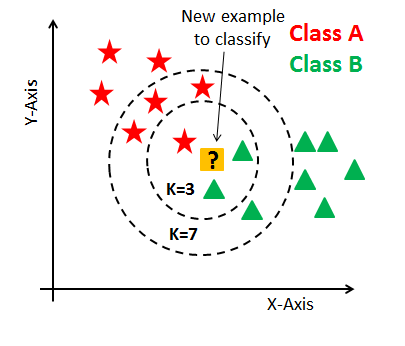

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
predict_value = knn.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-setosa


In [14]:
y_pred = knn.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [15]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.2581988897471611


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  1  8]]


0.9333333333333333

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



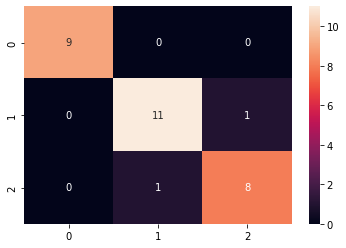

In [18]:
 sn.heatmap(confusion_matrix(y_test,y_pred),annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


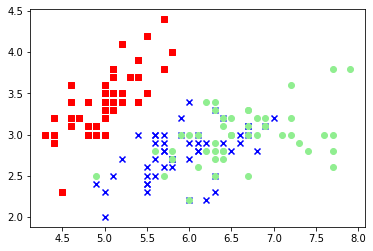

In [19]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

#Decision Trees 
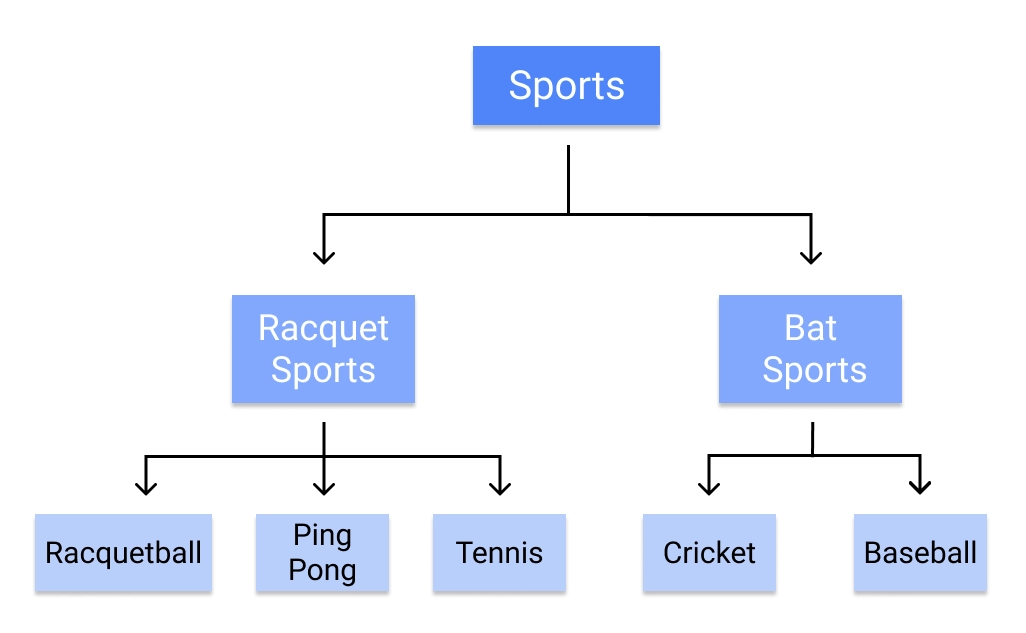

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
predict_value = dtc.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-versicolor


In [22]:
y_pred1 = dtc.predict(x_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [23]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred1))
print(rmse)

0.31622776601683794


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[ 9  0  0]
 [ 0 10  2]
 [ 0  1  8]]


0.9

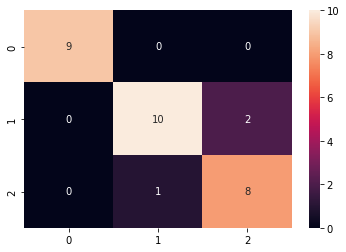

In [25]:
sn.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

In [26]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.83      0.87        12
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [27]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= -0.50
|   |--- class: 0
|--- feature_3 >  -0.50
|   |--- feature_3 <= 0.59
|   |   |--- feature_2 <= 0.69
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.69
|   |   |   |--- feature_0 <= 0.41
|   |   |   |   |--- feature_1 <= -1.39
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  -1.39
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.41
|   |   |   |   |--- class: 2
|   |--- feature_3 >  0.59
|   |   |--- class: 2



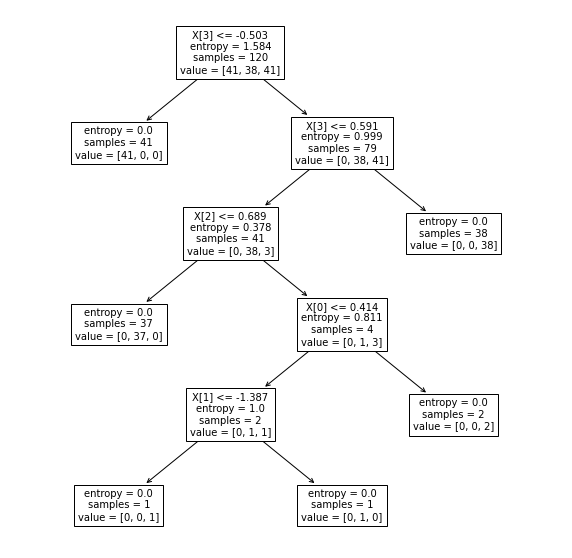

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)
plt.show()

#Random Forest Classifier
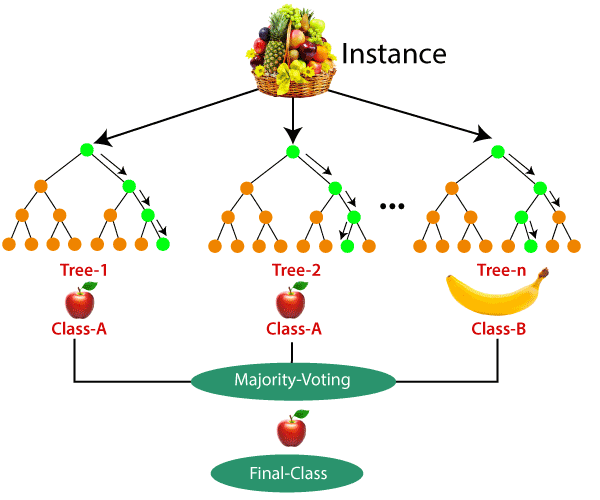

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [30]:
predict_value = rfc.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-setosa


In [31]:
y_pred2 = dtc.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [32]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred2))
print(rmse)

0.31622776601683794


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)


[[ 9  0  0]
 [ 0 10  2]
 [ 0  1  8]]


0.9

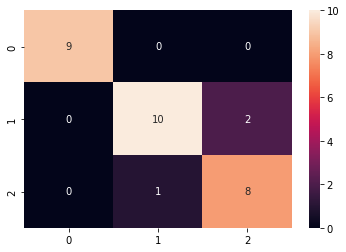

In [34]:
sn.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

In [35]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.83      0.87        12
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



#Naive Bayes Classifier
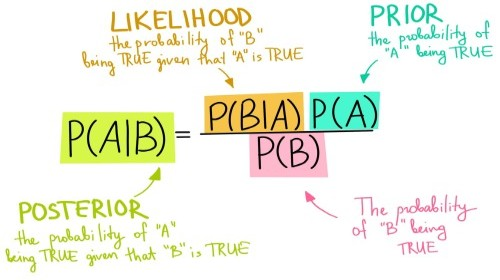

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [37]:
predict_value = gnb.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-versicolor


In [38]:
y_pred3= gnb.predict(x_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [2 2]
 [2 1]
 [0 0]
 [2 1]
 [2 2]
 [2 2]
 [2 2]]


In [39]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred3))
print(rmse)

0.3651483716701107


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[9 0 0]
 [0 8 4]
 [0 0 9]]


0.8666666666666667

In [41]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.67      0.80        12
           2       0.69      1.00      0.82         9

    accuracy                           0.87        30
   macro avg       0.90      0.89      0.87        30
weighted avg       0.91      0.87      0.87        30



#SVM
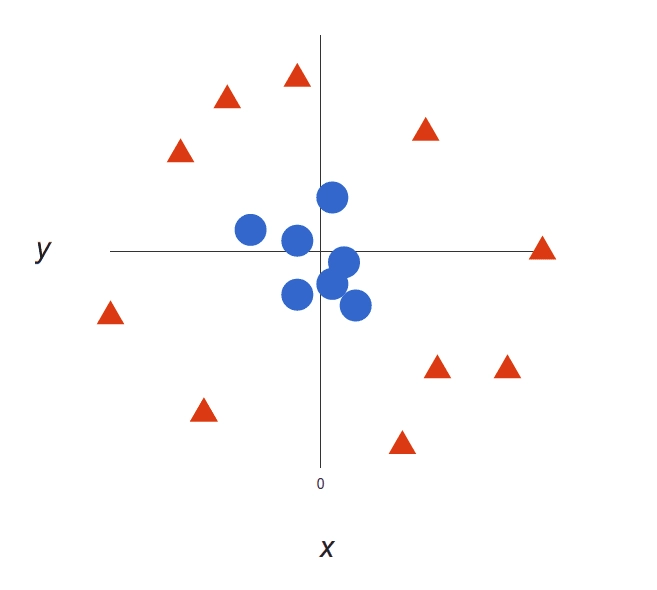
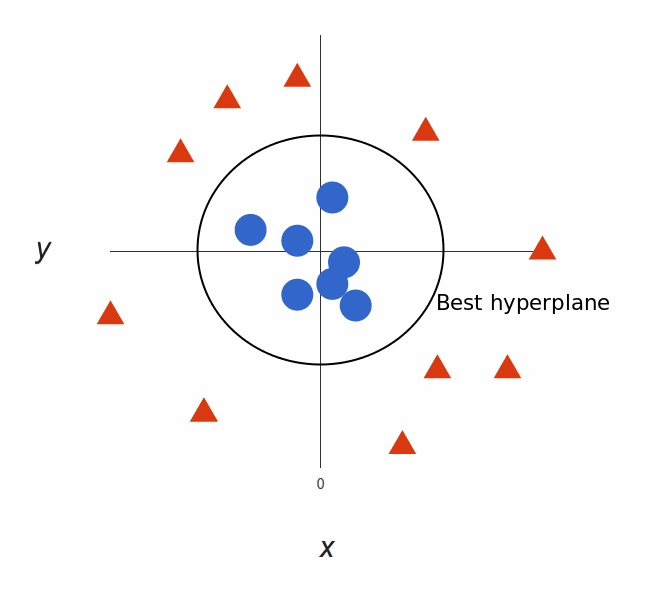

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [43]:
predict_value = svc.predict(sc.transform([[4.5,3,2,1]]))
if(predict_value == 0):
  print("Iris-setosa")
elif(predict_value == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica	")

Iris-setosa


In [44]:
y_pred4 = svc.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


0.9666666666666667

In [46]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [47]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred4))
print(rmse)

0.18257418583505536
